<a href="https://colab.research.google.com/github/bakesia/AI-class/blob/main/4%EC%A3%BC%EC%B0%A8/wine_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# 라이브러리 로딩
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# -----------------------------
# 1) 데이터 준비(화이트 와인 데이터)
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/4주/winequality-white.csv", sep=";").dropna()
print(df.head())

# quality만 땜
X = df.drop("quality", axis=1)
y = df["quality"]

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [21]:
# 스케일링 (getdummy가 one-hot 인코딩, X도 numpy로)

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values

In [22]:
# 학습/테스트 분할

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [23]:
# 모델 구성 (dense 수를 늘리던지, 드롭아웃 수 늘리던지)

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# 모델 컴파일

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [25]:
# 학습 (epoch 수 알아서 조절)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3668 - loss: 1.7060 - val_accuracy: 0.5255 - val_loss: 1.1730
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4934 - loss: 1.2128 - val_accuracy: 0.5459 - val_loss: 1.0966
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5245 - loss: 1.1231 - val_accuracy: 0.5561 - val_loss: 1.0654
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5518 - loss: 1.0833 - val_accuracy: 0.5536 - val_loss: 1.0510
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5380 - loss: 1.1175 - val_accuracy: 0.5663 - val_loss: 1.0396
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5710 - loss: 1.0492 - val_accuracy: 0.5497 - val_loss: 1.0397
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5492 - loss: 1.0684 - val_accuracy: 0.5459 - val_loss: 1.0283
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5593 - loss: 1.0675 - val_accuracy: 0.

In [26]:
# 예측

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


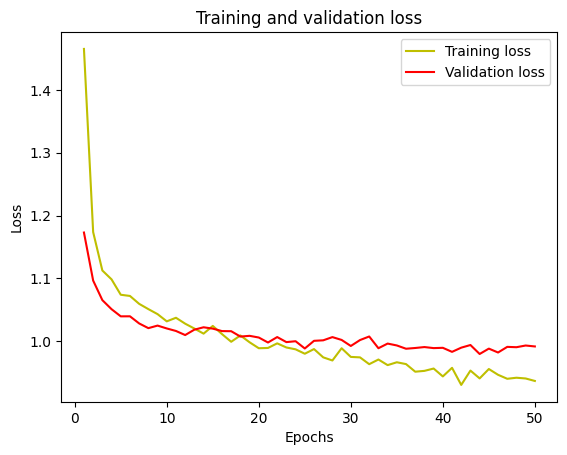

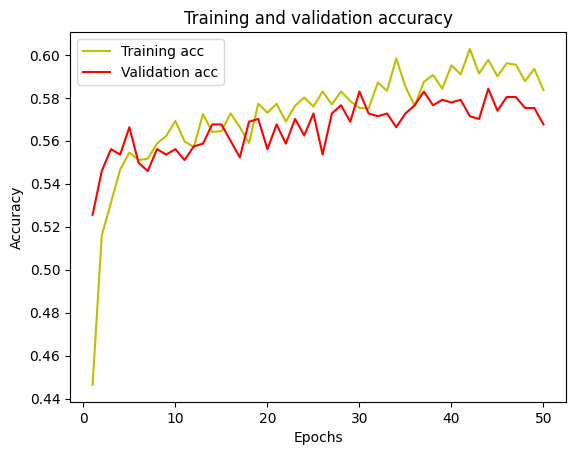

In [27]:
# 학습 곡선 시각화

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 곡선 시각화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# 분류 성능 평가

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.80      0.16      0.26        51
           2       0.58      0.63      0.60       295
           3       0.53      0.66      0.59       409
           4       0.53      0.39      0.45       183
           5       1.00      0.06      0.11        33

    accuracy                           0.55       980
   macro avg       0.74      0.34      0.37       980
weighted avg       0.58      0.55      0.53       980

[[  1   0   5   2   1   0]
 [  0   8  32  10   1   0]
 [  0   2 187 103   3   0]
 [  0   0  92 269  48   0]
 [  0   0   8 103  72   0]
 [  0   0   0  20  11   2]]
